<a href="https://colab.research.google.com/github/joshiakshada0404/CNN_Learning/blob/main/Celsius_to_Fahrenheit_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Celsius_to_Fahrenheit_Model

In [ ]:
# import dependencies

import tensorflow as tf
# show only error
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

import numpy as np

In [ ]:
# set up training data
#input data
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

for i,c in enumerate(celsius_q):
  print("{} degree Celsius = {} degree Fahrenhet.".format(c, fahrenheit_a[i]))

-40.0 degree Celsius = -40.0 degree Fahrenhet.
-10.0 degree Celsius = 14.0 degree Fahrenhet.
0.0 degree Celsius = 32.0 degree Fahrenhet.
8.0 degree Celsius = 46.0 degree Fahrenhet.
15.0 degree Celsius = 59.0 degree Fahrenhet.
22.0 degree Celsius = 72.0 degree Fahrenhet.
38.0 degree Celsius = 100.0 degree Fahrenhet.


In [ ]:
# create model

#we will use simple possible model we can - dense network 
#since the problem is strainghtforward this network will require only a single layer witha single neuron.

#layer0 = l0
l0 = tf.keras.layers.Dense(units=1, input_shape = [1])



In [ ]:
#Assemble layers into the model

model = tf.keras.Sequential([l0])

In [ ]:
# compile the model , with loss and optimisation functions

model.compile(loss='mean_squared_error',
             optimizer = tf.keras.optimizers.Adam(0.1))

In [ ]:
# train the model

history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose = False)
print("Finished training the model")

Finished training the model


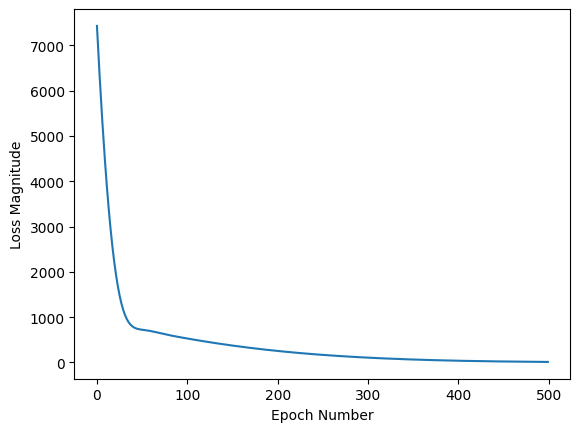

In [ ]:
# display training statistics

import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [ ]:
# Use the model to pridict values

print(model.predict([100.0]))

1/1 [==============================] - 0s 110ms/step
[[211.28189]]


In [ ]:
# looking at the layer weights

print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8282238]], dtype=float32), array([28.45951], dtype=float32)]


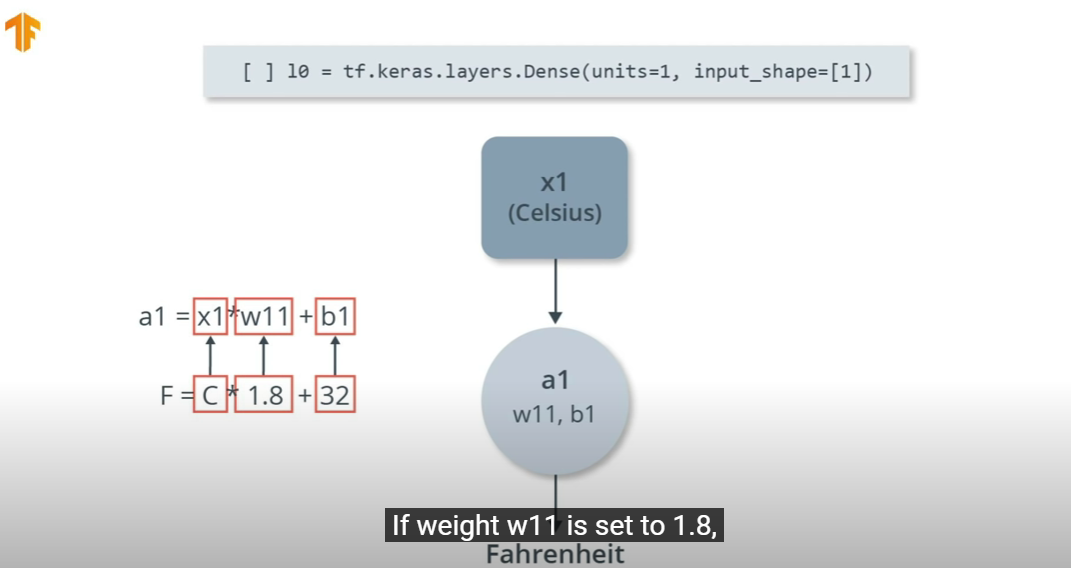

Experiment : What if we created more dense layers with different units, whuch therefore also has more variables ?

In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units =4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose= False)
print(model.predict([100.0]))
print("Model predicts that 100 degree Celsius is: {} degree Fahreheit.".format(model.predict([100.0])))
print("These are the l0 varibles: {}".format(l0.get_weights()))
print("These are the l1 varibles: {}".format(l1.get_weights()))
print("These are the l2 varibles: {}".format(l2.get_weights()))

1/1 [==============================] - 0s 60ms/step
[[211.74744]]
1/1 [==============================] - 0s 32ms/step
Model predicts that 100 degree Celsius is: [[211.74744]] degree Fahreheit.
These are the l0 varibles: [array([[ 0.4414503 ,  0.48592305, -0.12837726,  0.23271252]],
      dtype=float32), array([ 3.8332446,  3.5297709, -3.2910852, -0.6710409], dtype=float32)]
These are the l1 varibles: [array([[ 1.2771068 , -0.70993936,  0.47676343, -0.4940144 ],
       [ 0.83659583, -0.93212384,  0.05724688, -0.9235083 ],
       [-1.6044791 ,  0.2752714 , -0.58023745,  0.07195623],
       [-0.40525654,  0.1644255 , -0.29540965,  1.1698604 ]],
      dtype=float32), array([ 3.9732423 , -1.5757325 , -2.0044925 , -0.08860049], dtype=float32)]
These are the l2 varibles: [array([[ 1.5085423 ],
       [-0.26501253],
       [-0.27118608],
       [-0.07332835]], dtype=float32), array([3.581993], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the `l0` and `l1` layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.